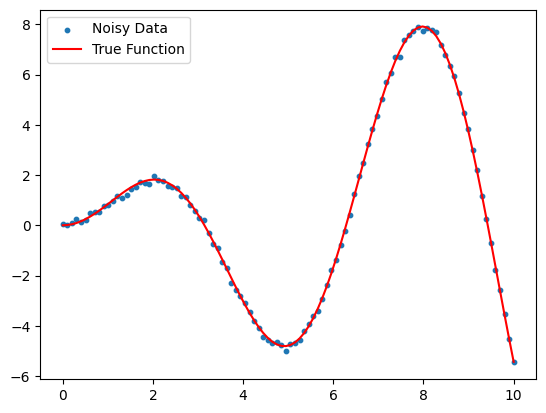

In [1]:
import numpy as np

# 生成数据: y = x * sin(x) + 噪声
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 输入特征 (100个样本)
y = X * np.sin(X) + np.random.normal(0, 0.1, size=X.shape)  # 目标值 + 噪声

# 可视化数据
import matplotlib.pyplot as plt
plt.scatter(X, y, s=10, label="Noisy Data")
plt.plot(X, X * np.sin(X), 'r-', label="True Function")
plt.legend()
plt.show()

In [3]:
from gplearn.genetic import SymbolicRegressor

# 定义符号回归模型
est = SymbolicRegressor(
    population_size=1000,  # 种群大小（个体数量）
    generations=20,        # 进化代数
    stopping_criteria=0.01, # 如果适应度<0.01则停止
    p_crossover=0.7,      # 交叉概率
    p_subtree_mutation=0.1, # 子树变异概率
    p_hoist_mutation=0.05,  # 提升变异概率
    p_point_mutation=0.1,   # 点变异概率
    max_samples=0.9,       # 每代使用的样本比例
    verbose=1,             # 打印进化过程
    function_set=('add', 'sub', 'mul', 'sin')  # 允许的运算符/函数
)

# 拟合模型
est.fit(X, y)

# 输出最佳表达式
print("最佳表达式:", est._program)

/home/wbc/Apps/anaconda3/envs/hmcode/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/wbc/Apps/anaconda3/envs/hmcode/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    28.66          1641.47        6         0.579013         0.716707      7.06s
   1    15.47          4.21116        9         0.428106         0.451886      5.81s
   2    18.63          6.18069        4        0.0695654        0.0967131      5.87s
   3    11.71           6.5907       16        0.0678471         0.112178      5.85s
   4     8.73          119.085        4        0.0667314         0.122219      6.24s
   5     4.46          23.4935        4        0.0664165         0.125054      1.39m
   6     4.24          8.27403        4        0.0653003         0.135099    -69.86s
   7     4.27          5.45025        4        0.0670219         0.119605      3.69s
   8     4.42           10.865        4        0.0664859         0.124429  

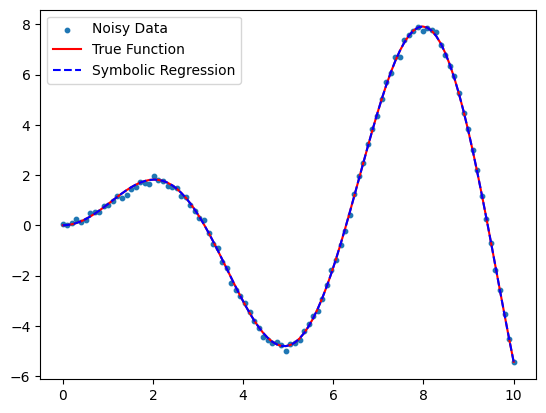

In [4]:
# 预测
y_pred = est.predict(X)

# 可视化
plt.scatter(X, y, s=10, label="Noisy Data")
plt.plot(X, X * np.sin(X), 'r-', label="True Function")
plt.plot(X, y_pred, 'b--', label="Symbolic Regression")
plt.legend()
plt.show()